**features**:

num_stays: total number of unit stays

stay_length: total length of unit stays (use service mean stay length to impute)

num_unique_services: number of unique services

num_transfer: number of admission transfers (different discharge and admission unit)

num_cvd_readmission: number of readmissions that are caused by cardiovascular

CVD: whether the patient has a cardiovescular diagnosis

*Different Service name*: number of times they stay in this unit

*Different Age bins*: number of unit stays within this age range

age_mean: the mean admission age for each patient

age_std: the std of the admission age for each patient

freq: the frequency of lab tests per year

readmission: whether this patient has been admitted again

died: whether this patient is dead or not 

AO: whether this patinet has been exposed to Agentorange

unique_admitting_specialty: (hasn't tidied the specialty)

unique_discharging_specialty: (hasn't tidied the specialty)

We'll not consider location dataset anymore

In [1]:
import pandas as pd
import os
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
DATA_PATH = "../../../../bhatti/dataset/VCHAMPS"
dataset_path = 'inpatient_admissions_train.csv'
load_path = os.path.join(DATA_PATH, dataset_path)
in_ad = pd.read_csv(load_path,index_col=0)
in_ad

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,No,No,NaN,Yes,Utah
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,No,Yes,No,No,North Carolina
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,No,No,NaN,No,North Carolina
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,Regular,No,Yes,NaN,Yes,Florida
5,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,Regular,No,No,NaN,NaN,Idaho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665831,99965,93.433950,2022-07-21 02:36:19.0,2022-08-01 14:55:43.0,MEDICINE,MEDICINE,SUBST ABUSE CWT/TRANS RESID,GENERAL(ACUTE MEDICINE),Chronic or unspecified duodenal ulcer with hem...,Diastolic (congestive) heart failure,Regular,No,No,NaN,No,California
665832,99975,86.145532,2015-08-08 04:36:10.0,2015-08-17 03:26:06.0,MEDICINE,MEDICINE,Not specified,GENERAL(ACUTE MEDICINE),"Cutaneous abscess, furuncle and carbuncle of l...","Finding of other specified substances, not nor...",Regular,No,Yes,NaN,No,Minnesota
665833,99975,88.555516,2018-01-05 00:59:05.0,2018-01-06 23:18:39.0,NON-COUNT,NON-COUNT,PODIATRY,MEDICAL OBSERVATION,"Umbilical hernia with obstruction, without gan...",Essential (primary) hypertension,Regular,No,No,NaN,No,Minnesota
665834,99986,73.435908,2019-06-26 19:47:10.0,2019-06-29 21:18:00.0,MEDICINE,MEDICINE,INTERMEDIATE MEDICINE,GENERAL(ACUTE MEDICINE),Cellulitis and acute lymphangitis of other par...,Other chronic osteomyelitis,Regular,No,Yes,NaN,No,Nevada


### Died at location

In [99]:
in_ad["Died during admission"] = in_ad["Died during admission"].replace({"Yes":1, "No": 0})
in_ad["Agentorangeflag"] = in_ad["Agentorangeflag"].replace({"Yes":1, "No": 0})

### Num transfers

In [100]:
in_ad['Transfer'] = [0] * len(in_ad)
def transfer(data):
    data.loc[data['Admitting unit service'] != data['Discharging unit service'], 'Transfer'] = 1
    return data
in_ad = transfer(in_ad)

### Regrouping Admitting Unit Serivice

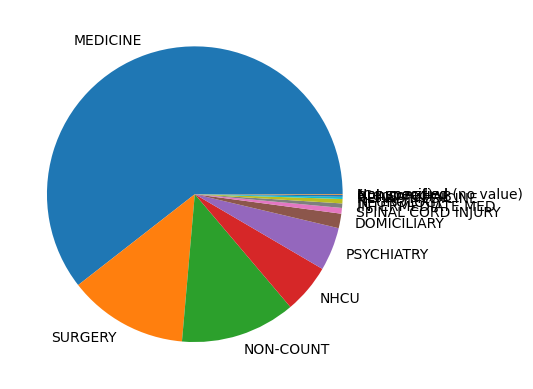

In [101]:
plt.pie(in_ad["Admitting unit service"].value_counts(), labels = in_ad["Admitting unit service"].value_counts().index);

In [102]:
in_ad["Admitting unit service"].unique()

array(['NON-COUNT', 'MEDICINE', 'SURGERY', 'NHCU', 'PSYCHIATRY',
       'REHAB MEDICINE', 'INTERMEDIATE MED', 'NEUROLOGY', 'DOMICILIARY',
       'BLIND REHAB', '(Censored)', 'SPINAL CORD INJURY',
       'Not specified (no value)', 'Not specified'], dtype=object)

In [103]:
in_ad["Admitting unit service"] = in_ad["Admitting unit service"].replace({'REHAB MEDICINE':'OTHERS', 'BLIND REHAB':'OTHERS',
                                        '(Censored)':'NON-COUNT', 'Not specified (no value)':'NON-COUNT', 'Not specified':'NON-COUNT',
                                        'INTERMEDIATE MED':'OTHERS', 'NEUROLOGY':'OTHERS', 'SPINAL CORD INJURY':'OTHERS'})
in_ad = pd.concat([in_ad, pd.get_dummies(in_ad['Admitting unit service'])], axis=1)

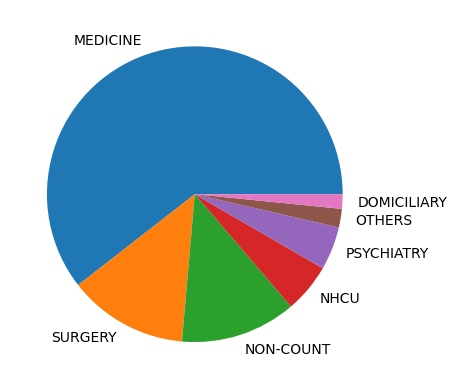

In [104]:
plt.pie(in_ad["Admitting unit service"].value_counts(), labels = in_ad["Admitting unit service"].value_counts().index);

### Length of Stay

In [105]:
admission_stay_length = []
for i, row in in_ad.iterrows():
    start = row["Admission date"]
    end = row["Discharge date"]

    start = pd.to_datetime(start,
               format='%Y-%m-%d %H:%M:%S.%f')
    end = pd.to_datetime(end,
               format='%Y-%m-%d %H:%M:%S.%f')
    
    diff = pd.Timedelta(end - start).days
    diff += round(pd.Timedelta(end - start).seconds/3600/24,2)

    admission_stay_length.append(diff)

in_ad["stay_length"] = admission_stay_length # in terms of day

#### Imputation

In [106]:
mean_stay_length = in_ad.groupby("Admitting unit service")["stay_length"].mean()
nan_admission = in_ad[in_ad["stay_length"].isna()]
in_ad = in_ad[~in_ad["stay_length"].isna()]

In [107]:
admission_stay_length = []
for i, row in nan_admission.iterrows():
    service = row["Admitting unit service"]
    diff = mean_stay_length[service]

    admission_stay_length.append(round(diff,2))

nan_admission["stay_length"] = admission_stay_length

In [108]:
in_ad = pd.concat([in_ad, nan_admission])
in_ad

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,...,State,Transfer,DOMICILIARY,MEDICINE,NHCU,NON-COUNT,OTHERS,PSYCHIATRY,SURGERY,stay_length
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,...,Utah,0,0,0,0,1,0,0,0,0.33
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,...,North Carolina,0,0,1,0,0,0,0,0,2.81
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,...,North Carolina,0,0,0,0,0,0,0,1,9.18
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,...,Florida,0,0,0,0,0,0,0,1,8.28
5,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,...,Idaho,0,0,1,0,0,0,0,0,10.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656612,78051,78.979333,2016-10-20 22:42:41.0,NaN,NHCU,NHCU,"PULMONARY, NON-TB",NH LONG-STAY CONTINUING CARE,(Censored),"Urinary tract infection, site not specified",...,Texas,0,0,0,1,0,0,0,0,98.51
657425,88349,74.120852,2025-04-06 04:06:43.0,NaN,MEDICINE,MEDICINE,GENERAL SURGERY,GENERAL(ACUTE MEDICINE),Not specified,Not specified,...,Nevada,0,0,1,0,0,0,0,0,5.86
663273,96010,81.459315,2020-10-08 09:06:47.0,NaN,OTHERS,SPINAL CORD INJURY,PTSD RESID REHAB PROG,GENERAL(ACUTE MEDICINE),Not specified,Not specified,...,Ohio,0,0,0,0,0,1,0,0,23.12
665052,96702,63.414981,2023-10-01 04:12:48.0,NaN,MEDICINE,MEDICINE,DOMICILIARY PTSD,GENERAL(ACUTE MEDICINE),Not specified,Not specified,...,Rhode Island,0,0,1,0,0,0,0,0,5.86


### Age at admission

Divide to different age bins: (20-40], (40-60], (60-80], (80-100], (100-120]

In [109]:
print(in_ad["Age at admission"].min())
print(in_ad["Age at admission"].max())

20.39913281527081
109.22492751557988


In [110]:
in_ad['Age 20-40'] = [0] * len(in_ad)
in_ad['Age 40-60'] = [0] * len(in_ad)
in_ad['Age 60-80'] = [0] * len(in_ad)
in_ad['Age 80-100'] = [0] * len(in_ad)
in_ad['Age 100-120'] = [0] * len(in_ad)
def age_category(data):
    data.loc[(data['Age at admission'] > 20) & (data['Age at admission'] <= 40), 'Age 20-40'] = 1
    data.loc[(data['Age at admission'] > 40) & (data['Age at admission'] <= 60), 'Age 40-60'] = 1
    data.loc[(data['Age at admission'] > 60) & (data['Age at admission'] <= 80), 'Age 60-80'] = 1
    data.loc[(data['Age at admission'] > 80) & (data['Age at admission'] <= 100), 'Age 80-100'] = 1
    data.loc[(data['Age at admission'] > 100) & (data['Age at admission'] <= 120), 'Age 100-120'] = 1
    return data
in_ad = age_category(in_ad)
in_ad

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,...,NON-COUNT,OTHERS,PSYCHIATRY,SURGERY,stay_length,Age 20-40,Age 40-60,Age 60-80,Age 80-100,Age 100-120
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,...,1,0,0,0,0.33,0,0,1,0,0
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,...,0,0,0,0,2.81,0,0,0,1,0
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,...,0,0,0,1,9.18,0,0,0,1,0
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,...,0,0,0,1,8.28,0,0,1,0,0
5,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,...,0,0,0,0,10.57,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656612,78051,78.979333,2016-10-20 22:42:41.0,NaN,NHCU,NHCU,"PULMONARY, NON-TB",NH LONG-STAY CONTINUING CARE,(Censored),"Urinary tract infection, site not specified",...,0,0,0,0,98.51,0,0,1,0,0
657425,88349,74.120852,2025-04-06 04:06:43.0,NaN,MEDICINE,MEDICINE,GENERAL SURGERY,GENERAL(ACUTE MEDICINE),Not specified,Not specified,...,0,0,0,0,5.86,0,0,1,0,0
663273,96010,81.459315,2020-10-08 09:06:47.0,NaN,OTHERS,SPINAL CORD INJURY,PTSD RESID REHAB PROG,GENERAL(ACUTE MEDICINE),Not specified,Not specified,...,0,1,0,0,23.12,0,0,0,1,0
665052,96702,63.414981,2023-10-01 04:12:48.0,NaN,MEDICINE,MEDICINE,DOMICILIARY PTSD,GENERAL(ACUTE MEDICINE),Not specified,Not specified,...,0,0,0,0,5.86,0,0,1,0,0


### Cardiovascular

In [111]:
cardiovascular = ["Heart failure, unspecified", "Other heart failure",
                  "Cardiogenic shock", "Hypertensive heart disease with heart failure",
                  "Hypertensive heart and kidney disease with heart failure", "Unstable angina", "Other forms of chronic ischemic heart disease",
                  "Atherosclerotic heart disease of native coronary artery", "Atrial fibrillation", "Atrial flutter",
                  "Supraventricular tachycardia", "Ventricular tachycardia"]

In [112]:
in_ad["cd_diagnosis"] = [0] * len(in_ad)
def cd_diagnosis(data):
    data.loc[(in_ad["Second listed discharge diagnosis icd10 subcategory"].str.contains('|'.join(cardiovascular))
      | in_ad["Second listed discharge diagnosis icd10 subcategory"].str.contains("Systolic (congestive) heart failure", regex=False)
      | in_ad["Second listed discharge diagnosis icd10 subcategory"].str.contains("Diastolic (congestive) heart failure", regex=False)
      | in_ad["Second listed discharge diagnosis icd10 subcategory"].str.contains("Combined systolic (congestive) and diastolic (congestive) heart failure", regex=False)
      | in_ad["Second listed discharge diagnosis icd10 subcategory"].str.contains("ST elevation (STEMI) myocardial infarction", regex=False)
      | in_ad["Second listed discharge diagnosis icd10 subcategory"].str.contains("Non-ST elevation (NSTEMI) myocardial infarction", regex=False)
      | in_ad["First listed discharge diagnosis icd10 subcategory"].str.contains('|'.join(cardiovascular))
      | in_ad["First listed discharge diagnosis icd10 subcategory"].str.contains("Systolic (congestive) heart failure", regex=False)
      | in_ad["First listed discharge diagnosis icd10 subcategory"].str.contains("Diastolic (congestive) heart failure", regex=False)
      | in_ad["First listed discharge diagnosis icd10 subcategory"].str.contains("Combined systolic (congestive) and diastolic (congestive) heart failure", regex=False)
      | in_ad["First listed discharge diagnosis icd10 subcategory"].str.contains("ST elevation (STEMI) myocardial infarction", regex=False)
      | in_ad["First listed discharge diagnosis icd10 subcategory"].str.contains("Non-ST elevation (NSTEMI) myocardial infarction", regex=False)), "cd_diagnosis"] = 1
    return data
in_ad = cd_diagnosis(in_ad)
in_ad


,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,...,OTHERS,PSYCHIATRY,SURGERY,stay_length,Age 20-40,Age 40-60,Age 60-80,Age 80-100,Age 100-120,cd_diagnosis
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,...,0,0,0,0.33,0,0,1,0,0,0
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,...,0,0,0,2.81,0,0,0,1,0,0
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,...,0,0,1,9.18,0,0,0,1,0,0
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,...,0,0,1,8.28,0,0,1,0,0,0
5,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,...,0,0,0,10.57,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656612,78051,78.979333,2016-10-20 22:42:41.0,NaN,NHCU,NHCU,"PULMONARY, NON-TB",NH LONG-STAY CONTINUING CARE,(Censored),"Urinary tract infection, site not specified",...,0,0,0,98.51,0,0,1,0,0,0
657425,88349,74.120852,2025-04-06 04:06:43.0,NaN,MEDICINE,MEDICINE,GENERAL SURGERY,GENERAL(ACUTE MEDICINE),Not specified,Not specified,...,0,0,0,5.86,0,0,1,0,0,0
663273,96010,81.459315,2020-10-08 09:06:47.0,NaN,OTHERS,SPINAL CORD INJURY,PTSD RESID REHAB PROG,GENERAL(ACUTE MEDICINE),Not specified,Not specified,...,1,0,0,23.12,0,0,0,1,0,0
665052,96702,63.414981,2023-10-01 04:12:48.0,NaN,MEDICINE,MEDICINE,DOMICILIARY PTSD,GENERAL(ACUTE MEDICINE),Not specified,Not specified,...,0,0,0,5.86,0,0,1,0,0,0


In [113]:
in_ad.columns

Index(['Internalpatientid', 'Age at admission', 'Admission date',
       'Discharge date', 'Admitting unit service', 'Discharging unit service',
       'Admitting specialty', 'Discharging specialty',
       'First listed discharge diagnosis icd10 subcategory',
       'Second listed discharge diagnosis icd10 subcategory',
       'Discharge disposition', 'Died during admission',
       'Outpatientreferralflag', 'Serviceconnectedflag', 'Agentorangeflag',
       'State', 'Transfer', 'DOMICILIARY', 'MEDICINE', 'NHCU', 'NON-COUNT',
       'OTHERS', 'PSYCHIATRY', 'SURGERY', 'stay_length', 'Age 20-40',
       'Age 40-60', 'Age 60-80', 'Age 80-100', 'Age 100-120', 'cd_diagnosis'],
      dtype='object')

### Agentorange Imputation

In [125]:
len(in_ad[in_ad["Agentorangeflag"].isna()])/len(in_ad)

0.199931132111566

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

no_na = in_ad[in_ad['Agentorangeflag'].notna()]
only_na = in_ad[in_ad['Agentorangeflag'].isna()]

zero=no_na[no_na.Agentorangeflag==0]
one=no_na[no_na.Agentorangeflag==1]

#upsample minority
Agentorange_upsampled = resample(one,
                          replace=True, # sample with replacement
                          n_samples=len(zero), # match number in majority class
                          random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([zero, Agentorange_upsampled])

# use upsampled data to train the model
X = upsampled[['Age at admission', 'Transfer', 'stay_length', 'cd_diagnosis','DOMICILIARY', 'MEDICINE', 'NHCU', 'NON-COUNT',
       'OTHERS', 'PSYCHIATRY', 'SURGERY']].values
Y = upsampled['Agentorangeflag'].values


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

forest = RandomForestClassifier(n_estimators=45, max_depth=25, random_state=False, 
                                max_features=0.6, min_samples_leaf=3, n_jobs=-1)

forest.fit(X_train, Y_train)

y_pred_train = forest.predict(X_train)
y_pred = forest.predict(X_test)

y_pred_proba = forest.predict_proba(X_test)

accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: "+str(log_loss(Y_test, y_pred_proba)))

ACCURACY: TRAIN=0.8662 TEST=0.8365
LOG LOSS: 0.39376561913846897


In [128]:
only_na = only_na[['Age at admission', 'Transfer', 'stay_length', 'cd_diagnosis','DOMICILIARY', 'MEDICINE', 'NHCU', 'NON-COUNT',
       'OTHERS', 'PSYCHIATRY', 'SURGERY']]
prediction = forest.predict(only_na)
only_na = in_ad[in_ad['Agentorangeflag'].isna()].drop('Agentorangeflag', axis=1)
only_na['Agentorangeflag'] = prediction

in_ad = [only_na, no_na]
in_ad = pd.concat(in_ad)

/home/hassan/.conda/envs/mla/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### Final dataset

In [149]:
tidy_dataset = []
for ids, group in tqdm(in_ad.groupby("Internalpatientid")):

    readmission = 0
    num_admissions = group["Age at admission"].nunique()
    if num_admissions > 1: readmission=1

    age_mean = group["Age at admission"].mean()
    age_std = group["Age at admission"].std()
    if group["Age at admission"].nunique() == 1: age_std = 0

    min_age = group["Age at admission"].min()
    max_age = group["Age at admission"].max()
    freq = len(group)/(math.floor(max_age - min_age) + 1)

    num_cvd_readmission = max(0, group['cd_diagnosis'].sum() - 1)

    cvd = 0
    if group["cd_diagnosis"].sum() > 0: cvd = 1
    
    Died = 0
    if group["Died during admission"].sum() > 0: Died = 1

    AO = 0
    if group["Agentorangeflag"].sum() > 0: AO = 1

    df = pd.DataFrame(data={'Internalpatientid': [ids], 'num_stays': [len(group)], 'stay_length': group["stay_length"].sum(),
                            'num_unique_units': group["Admitting unit service"].nunique(), "num_transfers": group["Transfer"].sum(), 
                            "num_cvd_readmission": [num_cvd_readmission], "Readmission":[readmission], "Died": [Died], "AO": [AO], "CVD": [cvd],
                            "unique_admitting_specialty": group["Admitting specialty"].nunique(), "unique_discharging_specialty": group["Discharging specialty"].nunique(),
                            "DOMICILIARY": group["DOMICILIARY"].sum(), "MEDICINE": group["MEDICINE"].sum(), "NHCU":group["NHCU"].sum(),
                            "NON-COUNT":group["NON-COUNT"].sum(), "OTHERS":group["OTHERS"].sum(), 'PSYCHIATRY': group['PSYCHIATRY'].sum(), 'SURGERY': group['SURGERY'].sum(),
                            'Age 20-40': group["Age 20-40"].sum(), 'Age 40-60': group["Age 40-60"].sum(), 'Age 60-80':group["Age 60-80"].sum(), 
                            'Age 80-100':group["Age 80-100"].sum(), 'Age 100-120':group["Age 100-120"].sum(), "age_mean": [age_mean], "age_std": [age_std], "freq": [round(freq,2)]
                            })
    
    df = df.reset_index(drop=True)
    tidy_dataset.append(df)
    
tidy_dataset = pd.concat(tidy_dataset)

  0%|          | 0/84536 [00:00<?, ?it/s]

In [150]:
tidy_dataset.columns

Index(['Internalpatientid', 'num_stays', 'stay_length', 'num_unique_units',
       'num_transfers', 'num_cvd_readmission', 'Readmission', 'Died', 'AO',
       'CVD', 'unique_admitting_specialty', 'unique_discharging_specialty',
       'DOMICILIARY', 'MEDICINE', 'NHCU', 'NON-COUNT', 'OTHERS', 'PSYCHIATRY',
       'SURGERY', 'Age 20-40', 'Age 40-60', 'Age 60-80', 'Age 80-100',
       'Age 100-120', 'age_mean', 'age_std', 'freq'],
      dtype='object')

In [146]:
tidy_dataset.to_csv("inpatient_full.csv")